### Sample code to read AWRA data

In [1]:
import numpy as np
import xarray as xr

# path
awra_dir = '/g/data/fj8/BoM/AWRA/DATA/'

# the precipitation data used to force the model
ds_P = xr.open_dataset(awra_dir + 'CLIMATE/rain_day/rain_day_2017.nc')

# AWRA estimated ET (etot), and rootzone soil moisture in % (sm_pct)
ds_E = xr.open_dataset(awra_dir + 'SCHEDULED-V6/etot_2017.nc')
ds_sm_pct = xr.open_dataset(awra_dir + 'SCHEDULED-V6/processed/values/day/sm_pct_2017.nc')

In [2]:
# look at what's inside the datatsets
ds_P

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 681, longitude: 841)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
Data variables:
    rain_day   (time, latitude, longitude) float32 ...
Attributes:
    var_name:  rain_day

In [3]:
ds_E

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 681, longitude: 841)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
Data variables:
    etot       (time, latitude, longitude) float64 ...
Attributes:
    var_name:  etot

In [4]:
ds_sm_pct

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 681, longitude: 841)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-31
  * latitude   (latitude) float64 -10.0 -10.05 -10.1 ... -43.9 -43.95 -44.0
  * longitude  (longitude) float64 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
Data variables:
    sm_pct     (time, latitude, longitude) float32 ...
Attributes:
    var_name:       sm_pct
    Conventions:    CF-1.6, ACDD-1.3
    institution:    Bureau of Meteorology
    summary:        Data produced by Bureau of Meteorology Australian Water R...
    url:            http://www.bom.gov.au/water/landscape
    title:          Australian Landscape Water Balance AWRA-L Model Version 6
    email:          awrams@bom.gov.au
    date_created:   2018-11-02T12:18:56
    source:         AWRA-L-v6)
    Description:    This data is provided by the Bureau of Meteorology and ca...
    date_modified:  2018-11-02T12:18:56

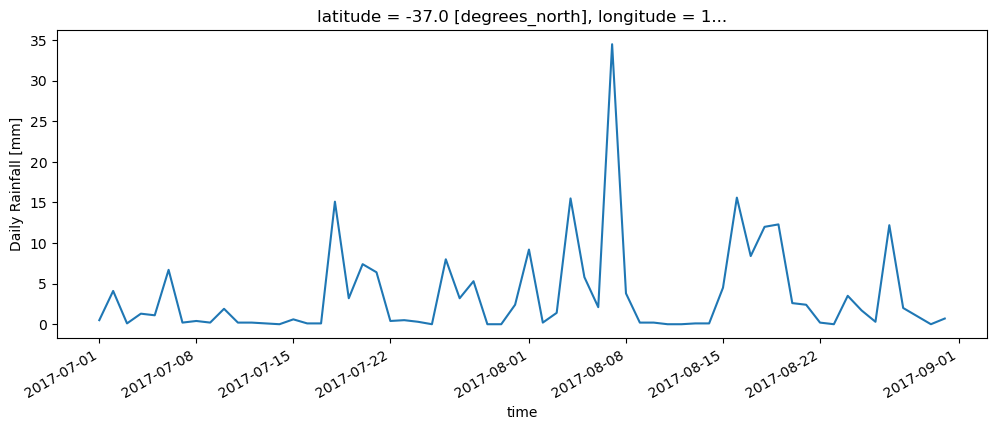

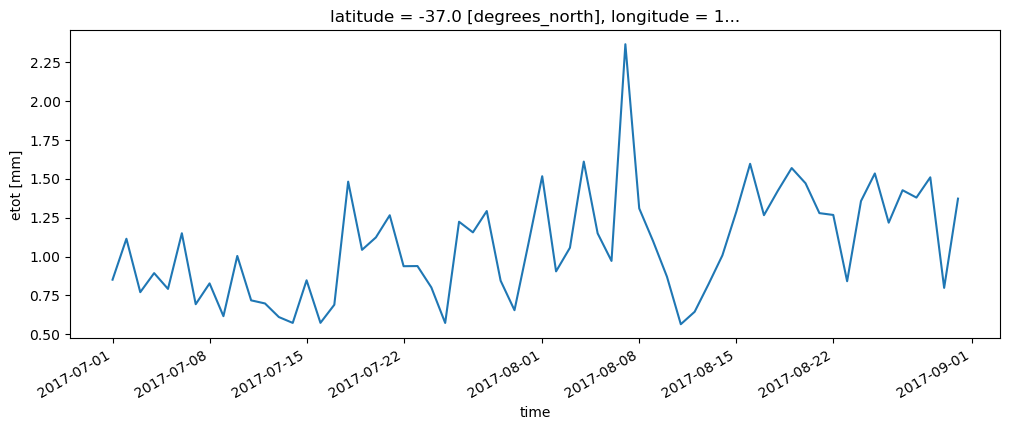

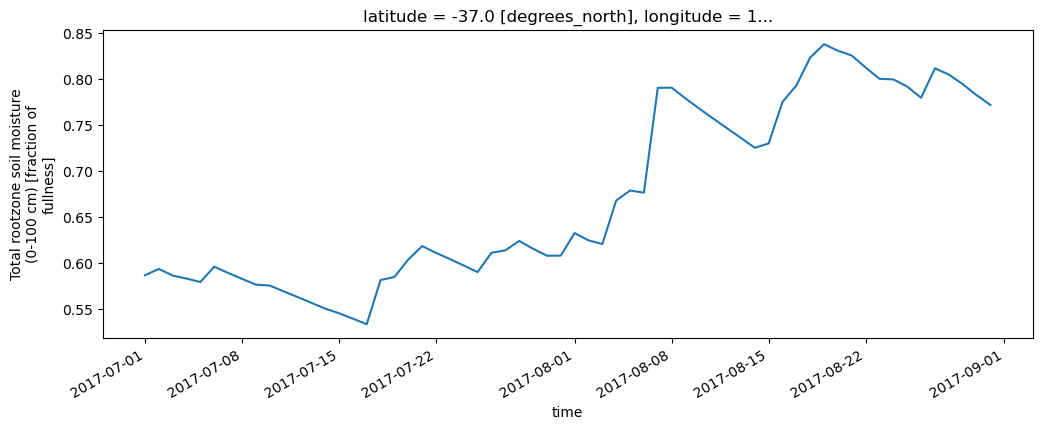

In [6]:
# Select a subset of the data at one point and plot it

lat_sel = -37
lon_sel = 148
time_sel = slice('2017-07', '2017-08')

da_P = ds_P['rain_day'].sel(latitude = lat_sel, longitude = lon_sel, time = time_sel)
da_E = ds_E['etot'].sel(latitude = lat_sel, longitude = lon_sel, time = time_sel)
da_sm_pct = ds_sm_pct['sm_pct'].sel(latitude = lat_sel, longitude = lon_sel, time = time_sel)

da_P.plot(size = 4, aspect = 3)
da_E.plot(size = 4, aspect = 3)
da_sm_pct.plot(size = 4, aspect = 3)